**PROBLEM STATEMENT**

• **DOMAIN:** Industrial safety. NLP based Chatbot.

• **CONTEXT:** 

The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the 
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

• **DATA DESCRIPTION:**
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an 
occurrence of an accident.
Columns description: 
‣ Data: timestamp or time/date information
‣ Countries: which country the accident occurred (anonymised)
‣ Local: the city where the manufacturing plant is located (anonymised)
‣ Industry sector: which sector the plant belongs to
‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors 
involved in the accident)
‣ Gender: if the person is male of female
‣ Employee or Third Party: if the injured person is an employee or a third party
‣ Critical Risk: some description of the risk involved in the accident
‣ Description: Detailed description of how the accident happened.
Link to download the dataset: https://drive.google.com/file/d/1_GmrRP1S2OIa02KlfOBNkYa8uxazGbfE/view?usp=sharing,
Original dataset link: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

**• PROJECT OBJECTIVE:**
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

**• PROJECT TASK:** [ Duration: 6 weeks, Score: 100 points]

1.** Milestone 1:** [ Duration: 2 weeks, Score: 20 points]
‣ Input: Interim report
‣ Process:
‣ Step 1: Import the data
‣ Step 2: Data cleansing
‣ Step 3: Data preprocessing
‣ Step 4: Data preparation to be used for AIML model learning
‣ Output: Clean data as .xlsx or .csv file to be used for AIML model learning

2.** Milestone 2:** [ Duration: 2 weeks, Score: 20 points]
‣ Input: Output of milestone 1
‣ Process:
‣ Step 1: NLP pre processing
‣ Step 2: Design, train and test machine learning classifiers 
‣ Step 3: Design, train and test Neural networks classifiers
‣ Step 4: Design, train and test RNN or LSTM classifiers
‣ Step 5: Choose the best performing model classifier and pickle it.
‣ Output: Pickled model to be used for future prediction
‣ Submission: Interim report 

3. Milestone 3: [ Duration: 2 weeks, Score: 60 points]
‣ Input: Pickled model from milestone 2
‣ Process: [ 15 points ]
‣ Step 1: Design a clickable UI which can automate tasks performed under milestone 1 [ 5 points ]
‣ Step 2: Design a clickable UI which can automate tasks performed under milestone 2 [ 5 points ]
‣ Step 3: Design a clickable UI based chatbot interface [ 5 points ]
‣ Output: Clickable UI based chatbot interface which accepts text as input and replies back with relevant answers.
‣ Submission: Final report [ 45 points ]

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px
from plotly import graph_objs as go
import plotly.figure_factory as ff
import nltk
from nltk.util import ngrams
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
from nltk import tokenize,stem
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



#  Import the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/jupyter/capstone/Data Set - industrial_safety_and_health_database_with_accidents_description.csv")
df.head(3)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


In [4]:
## Drop Unnamed colum & rename other columns
df.drop("Unnamed: 0", axis=1, inplace=True)
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


In [5]:
df.isna().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Country                   425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Gender                    425 non-null    object
 7   Employee type             425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [7]:
def find_unique_values_count(dataframe) :
    for column in dataframe :
         print("Unique value in column ", column , " is ", len(dataframe[column].unique()))
         print("Unique Values are :", dataframe[column].value_counts()) 
         print("############################################################################")

In [8]:
find_unique_values_count(df)

Unique value in column  Date  is  287
Unique Values are : 2017-02-08 00:00:00    6
2016-06-16 00:00:00    5
2016-05-04 00:00:00    4
2016-02-15 00:00:00    4
2016-06-08 00:00:00    4
                      ..
2017-05-17 00:00:00    1
2016-11-30 00:00:00    1
2017-01-29 00:00:00    1
2016-03-09 00:00:00    1
2016-04-17 00:00:00    1
Name: Date, Length: 287, dtype: int64
############################################################################
Unique value in column  Country  is  3
Unique Values are : Country_01    251
Country_02    130
Country_03     44
Name: Country, dtype: int64
############################################################################
Unique value in column  Local  is  12
Unique Values are : Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64
######################################################################

Identify the Critical Risk for "Others" type.

# Pre-processing

>Accidents may increase or decrease throughout the year or month, so I added datetime features such as year,month and day.

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)
df['Day'] = df['Date'].apply(lambda x : x.day)
df['Weekday'] = df['Date'].apply(lambda x : x.day_name())
df['WeekofYear'] = df['Date'].apply(lambda x : x.weekofyear)
df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1


# EDA

## Univariate Analysis

---



In [10]:
def createPieChart(df, column_name,title):
  return px.pie(df,names=column_name,labels=df[column_name].unique(),title=title)

### Country Wise Distribution

In [11]:
createPieChart(df,'Country','Country wise distribution')

- Country_01 has more accident records.

### Local

In [12]:
createPieChart(df,'Local','Local (city) wise distribution')

In [13]:
df[df['Local'] == 'Local_03'].Country.value_counts()

Country_01    90
Name: Country, dtype: int64

- Most of accidents are reported in Local_03 which belongs to Country_01.

### Industry Sector

In [14]:
createPieChart(df,'Industry Sector','Industry Sector wise distribution')

In [15]:
print(df[df['Industry Sector'] == 'Mining'].Country.value_counts())
print(df[df['Industry Sector'] == 'Mining'].Local.value_counts())

Country_01    203
Country_02     38
Name: Country, dtype: int64
Local_03    90
Local_01    57
Local_04    56
Local_02    24
Local_07    14
Name: Local, dtype: int64


- Most of accidents are belongs to mining sector reported in Local_03 which belongs to Country_01.

### Accident Levels


In [16]:
## Mapped Accident level & Potential Accident level to numeric
level_dct = {'I': 1,
       'II': 2,
       'III': 3,
       'IV': 4,
       'V': 5,
       'VI': 6}
df['Accident_Level_mapped'] = df['Accident Level'].replace(level_dct)
df['Potential_Accident_Level_mapped'] = df['Potential Accident Level'].replace(level_dct)

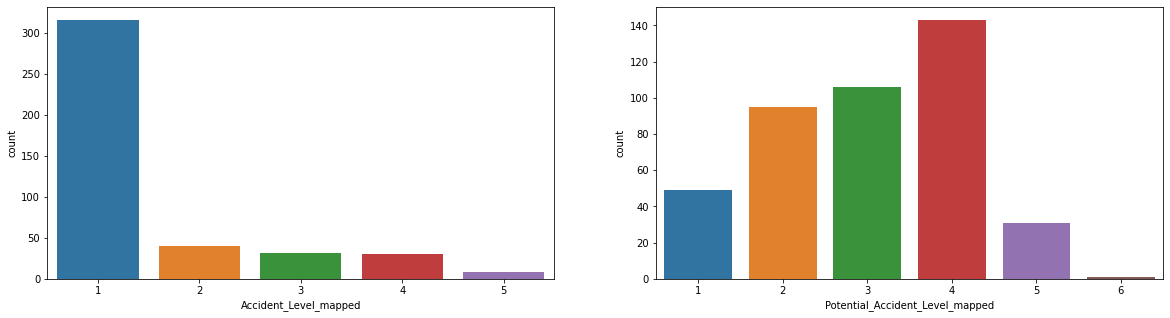

In [17]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
acc_level = "Accident_Level_mapped"
sns.countplot(data=df,x=acc_level,ax=ax[0])

pot_acc_level = "Potential_Accident_Level_mapped"
sns.countplot(data=df,x=pot_acc_level,ax=ax[1])

plt.show()

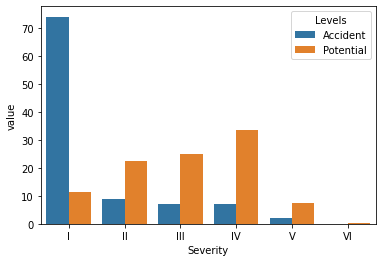

In [18]:
ac_level_cnt = np.round(df['Accident Level'].value_counts(normalize=True) * 100)
pot_ac_level_cnt = np.round(df['Potential Accident Level'].value_counts(normalize=True) * 100, decimals=1)
ac_pot = pd.concat([ac_level_cnt, pot_ac_level_cnt], axis=1,sort=False).fillna(0).rename(columns={'Accident Level':'Accident', 'Potential Accident Level':'Potential'})
ac_pot = pd.melt(ac_pot.reset_index(), ['index']).rename(columns={'index':'Severity', 'variable':'Levels'})

sns.barplot(x="Severity", y="value", hue="Levels", data=ac_pot)

- Less severe accidents are more frequent.

### Gender

In [19]:
createPieChart(df,'Gender','Gender wise distribution')

-  Proportion of men is significantly higher as per the industry sector.

### Employee type


In [20]:
createPieChart(df,'Employee type','Employee type wise distribution')

The large number of Third Party employee including remote type  are more prone to accidents based on industry sector.

### Critical Risks

In [21]:
fig = createPieChart(df,'Critical Risk','Critical Risk wise distribution')
fig.update_traces(textposition='inside')
fig.show()

- Most part of the Critical Risks are classified as 'Others', more effort is required to classify this precisely.

### Calendar


In [22]:
createPieChart(df,'Year','Year wise distribution')


- Security measures are improved as can see 2017 has less accident reported than 2016.

In [23]:
createPieChart(df,'Month','Month wise distribution')

-  During First half of year(month 1-6) reported more accidents. 

In [24]:
createPieChart(df,'Day','Day wise distribution')

In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot


fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
#fig.add_trace(createPieChart(df,'Year','Year wise distribution'), domain=dict(x=[0, 0.5]),row=1, col=1)

fig.add_trace(go.Pie(
     values=df.Year.unique(),
     domain=dict(x=[0, 0.5]),
     name="Year"), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=df.Year.unique(),
     domain=dict(x=[0.5, 1]),
     name="Year"), 
     row=1, col=1)



plot(fig)

'temp-plot.html'

## Multivariate Analysis

In [26]:
# Helper function for relation between Accident Level/Potential Accident levels and other labels
def createCountPlotByAccidentLevel(df, col1):
    fig = plt.figure(figsize = (15, 7.2))
    ax = fig.add_subplot(121)
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title(col1.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Accident Level'].unique())
    plt.xticks(rotation = 90)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title(col1.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Potential Accident Level'].unique())
    plt.xticks(rotation = 90)
    return plt.show()

In [27]:
# Helper function for relation between Accident Level/Potential Accident levels and other labels
def createCountPlot(df, col1, hue):
    fig = plt.figure(figsize = (15, 7.2))
    sns.countplot(x = col1, data = df,hue = hue).set_title(col1.capitalize() +' count plot by ' + hue, 
                                                                      fontsize = 13)
    plt.legend(labels = df[hue].unique())
    plt.xticks(rotation = 90)

    return plt.show()

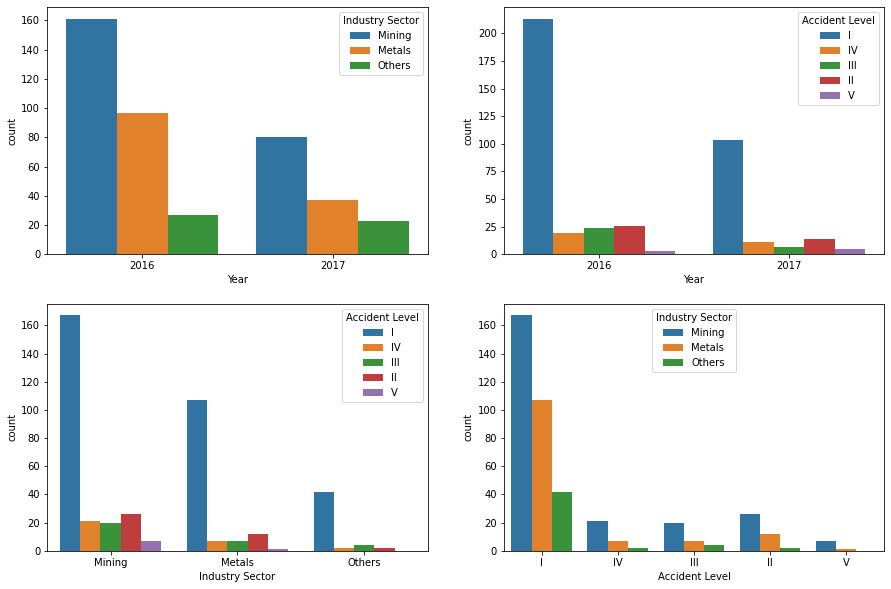

In [28]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.countplot(x=df['Industry Sector'],hue='Accident Level',data=df,ax=axs[1][0])
sns.countplot(x=df['Accident Level'],hue='Industry Sector',data=df,ax=axs[1][1])
sns.countplot(x=df['Year'],hue='Industry Sector',data=df,ax=axs[0][0])
sns.countplot(x=df['Year'],hue='Accident Level',data=df,ax=axs[0][1])

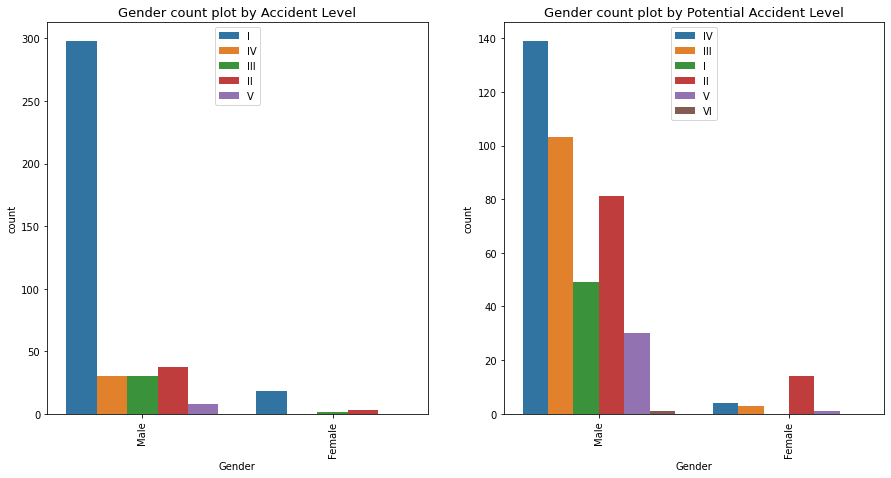

In [29]:
# Gender w.r.t Accident Level and Potential Accident Level
createCountPlotByAccidentLevel(df, 'Gender')

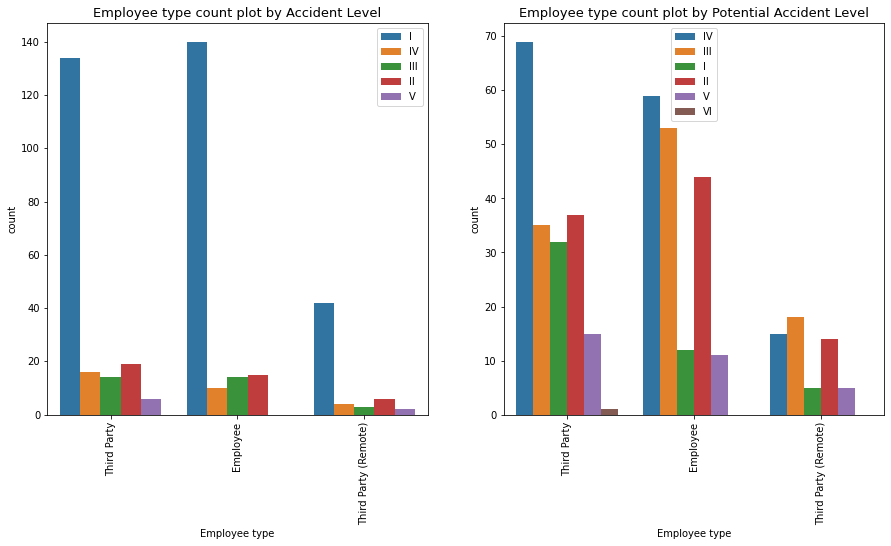

In [30]:
createCountPlotByAccidentLevel(df, 'Employee type')

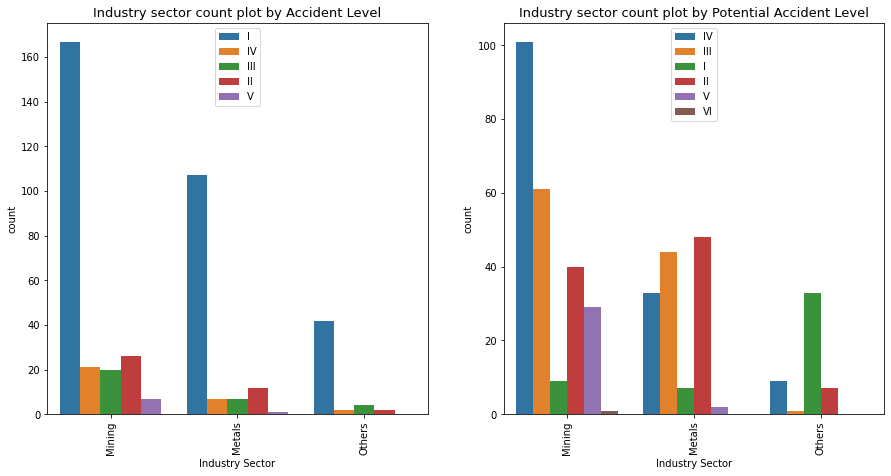

In [31]:
createCountPlotByAccidentLevel(df, 'Industry Sector')

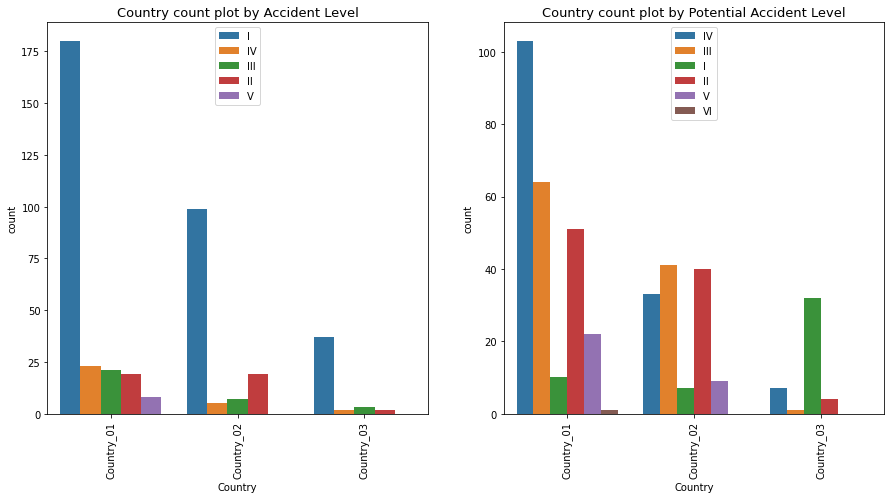

In [32]:
createCountPlotByAccidentLevel(df, 'Country')

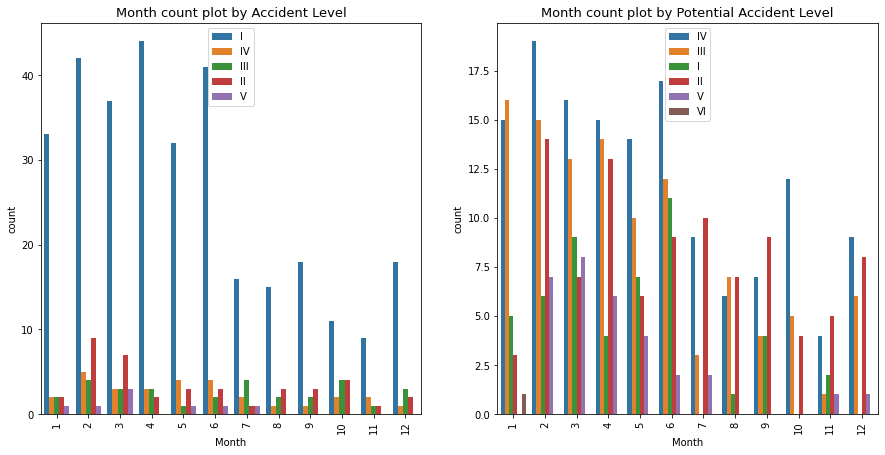

In [33]:
createCountPlotByAccidentLevel(df, 'Month')

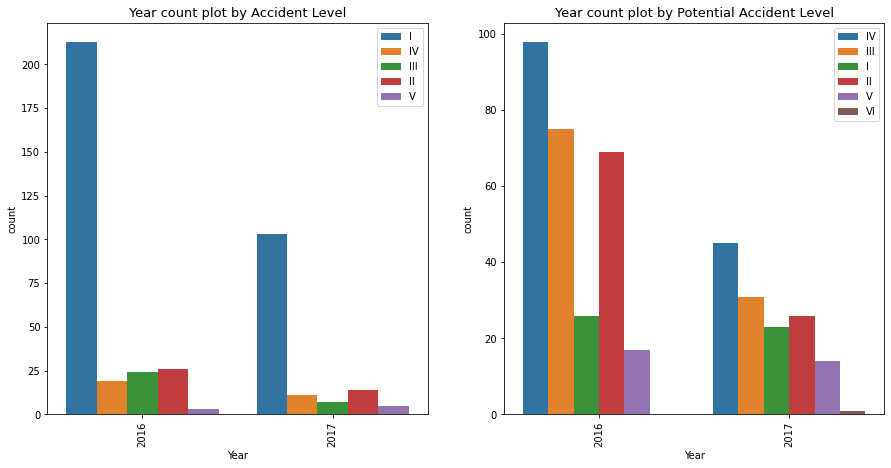

In [34]:
createCountPlotByAccidentLevel(df, 'Year')

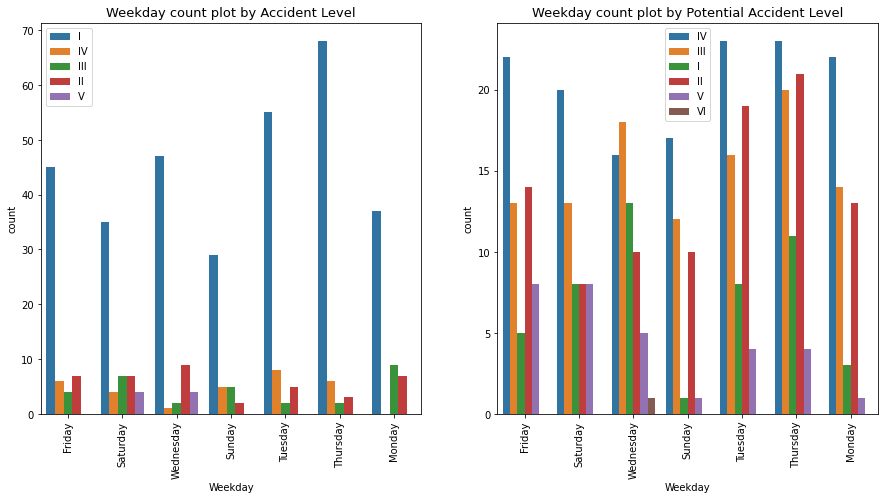

In [35]:
createCountPlotByAccidentLevel(df, 'Weekday')

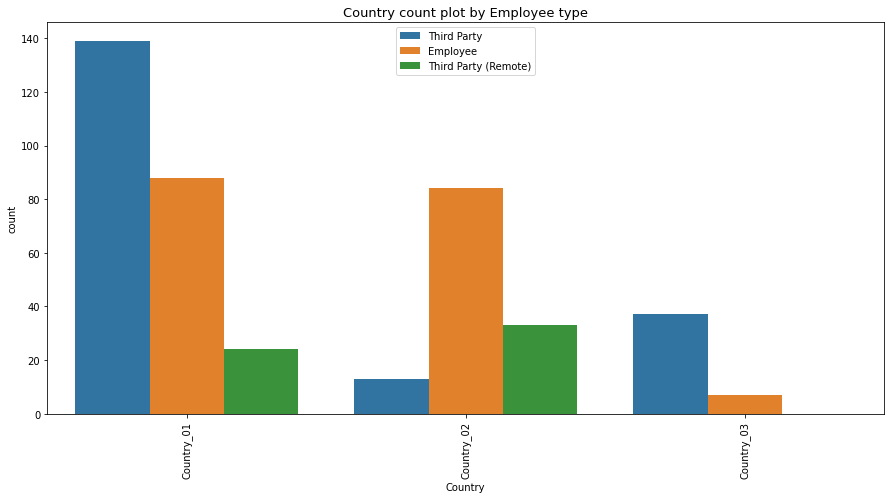

In [36]:
createCountPlot(df,"Country","Employee type")

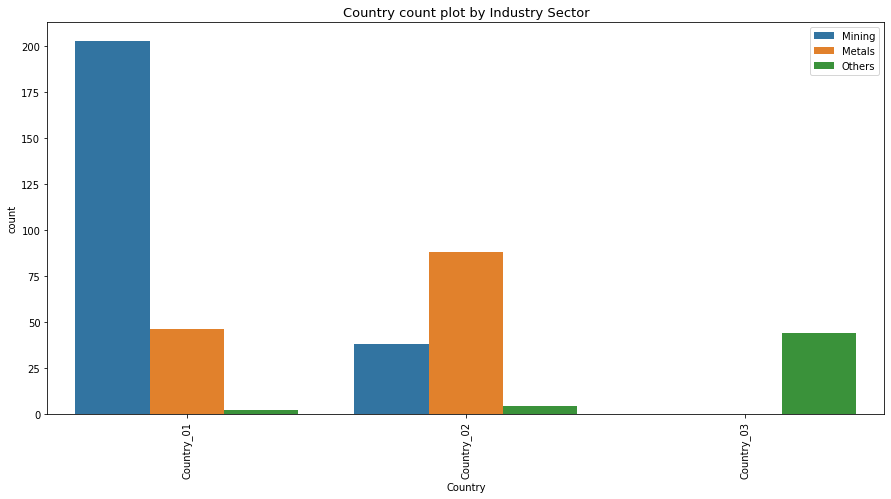

In [37]:
createCountPlot(df,"Country","Industry Sector")

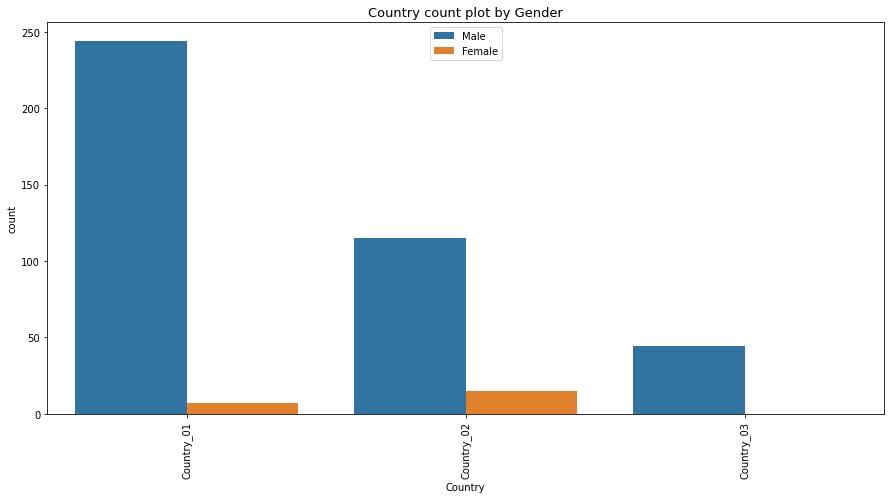

In [38]:
createCountPlot(df,"Country","Gender")

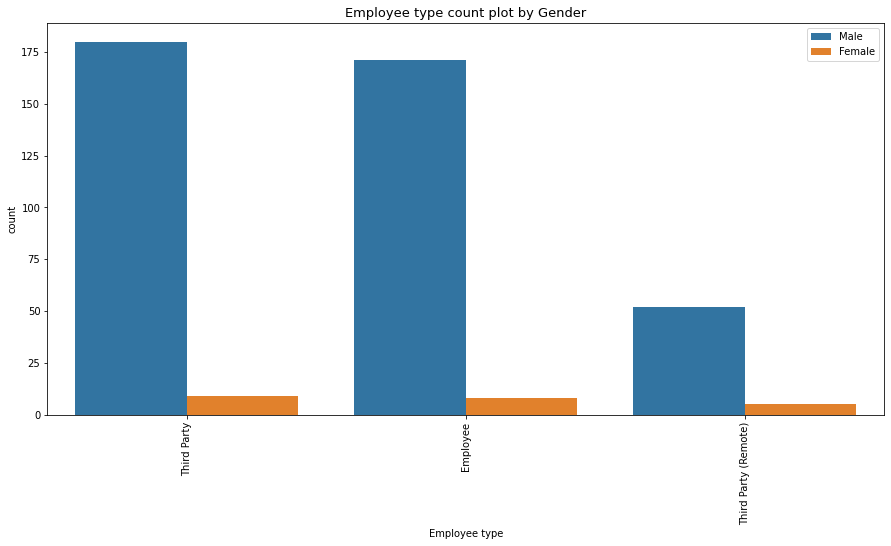

In [39]:
createCountPlot(df,"Employee type","Gender")

# NLP Preprocessing

- Description column contains the details of why accidents happend. So I tried to add new features by using this important information with NLP technique.

- In addition to the predifined stopwords in WORDCLOUD, I defined handmade-stopwords list by inspecting the documents in 'Description' column.

In [40]:
STOPWORDS.update(["cm", "kg", "mr", "wa" ,"nv", "ore", "da", "pm", "am", "cx"])
print(STOPWORDS)

{'why', 'him', 'out', 'cx', 'having', 'yours', 'from', 'have', 'their', "he'd", "it's", 'an', 'further', 'both', 'ever', 'cm', 'what', "there's", 'only', 'do', 'how', 'http', "couldn't", "he'll", 'would', 'be', 'like', 'own', "i've", 'it', 'hers', 'once', 'by', "don't", "they've", 'am', "hasn't", 'because', 'his', 'above', 'her', 'any', "she'd", 'into', 'to', "why's", 'can', "she's", 'no', "who's", "haven't", 'otherwise', 'up', 'doing', "you've", 'nor', 'your', 'they', 'www', 'could', 'same', 'most', 'are', 'this', 'over', 'a', 'whom', "wasn't", "she'll", "he's", 'more', 'some', 'ore', 'r', 'get', "i'll", 'since', 'but', "isn't", 'not', 'again', 'she', 'me', 'mr', 'during', 'had', "we're", 'below', 'through', 'after', 'while', 'does', "aren't", 'them', 'herself', 'at', 'just', "they'd", 'shall', 'under', 'with', 'for', 'as', "hadn't", 'very', 'ought', "that's", 'himself', 'few', 'pm', 'theirs', 'also', "they're", 'before', "i'm", 'down', 'those', 'else', 'and', 'such', 'themselves', 'd

In [41]:
def nlp_preprocesser(row):
    sentence = row.Description
    #convert all characters to lowercase
    lowered = sentence.lower()
    tok = tokenize.word_tokenize(lowered)

    #lemmatizing & stemming
    lemmatizer = stem.WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(i) for i in tok if i not in STOPWORDS]
    stemmer = stem.PorterStemmer()
    stems = [stemmer.stem(i) for i in lem if i not in STOPWORDS]

    #remove non-alphabetical characters like '(', '.' or '!'
    alphas = [i for i in stems if i.isalpha() and (i not in STOPWORDS)]
    return " ".join(alphas)

In [42]:
df['Description_processed'] = df.apply(nlp_preprocesser, axis=1)
df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Accident_Level_mapped,Potential_Accident_Level_mapped,Description_processed
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,1,4,remov drill rod jumbo mainten supervisor proce...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,1,4,activ sodium sulphid pump pipe uncoupl sulfid ...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,1,3,milpo locat level collabor excav work pick han...


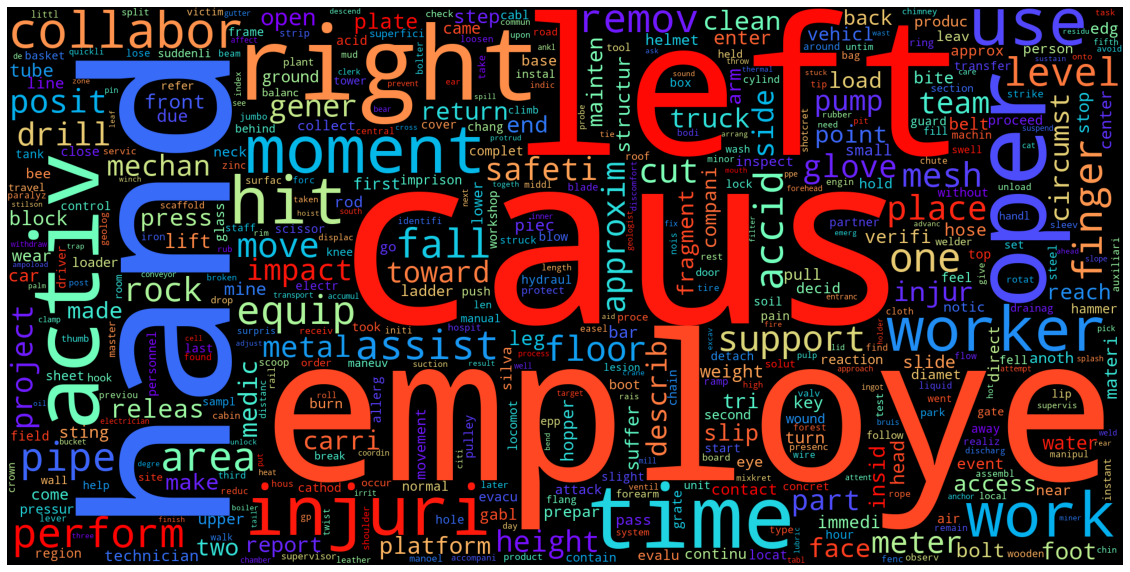

In [43]:
wordcloud = WordCloud(width = 2000, height = 1000, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=500, collocations=False, stopwords = STOPWORDS).generate(" ".join(df.Description_processed))
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()